In [1]:
%run yulesimon-lib.ipynb

# Trials

In [2]:
def trial(nn='CNN'):
    print('Processing...')
    print()

    a_N = np.array([])
    a_sqrt_mse = np.array([])
    a_avg_abs_errors = np.array([])
    a_std_abs_errors = np.array([])

    # change N [32..2048]
    for i in range(5, 12):
    # for i in [5, 6, 7, 8]:

        N = 2**i

        a_N = np.append(a_N, N)

        # data generation (fix random state)
        DATA_RANDOM_STATE = 0
        fix_random(seed=DATA_RANDOM_STATE)
        X, y, M = generate_data(N=N, 
                                num_alphas=100, 
                                samples_per_alpha=100, 
                                random_alpha=True, 
                                max_M_only=False, 
                                random_state=DATA_RANDOM_STATE)

        # reshape X for Conv1D
        if 'CNN' == nn:
            X = X.reshape(X.shape[0], X.shape[1], 1)

        # split train/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=DATA_RANDOM_STATE)

        # create model
        if 'CNN' == nn:
            model = create_cnn_model(X.shape[1], filters=32)
        elif 'DNN' == nn:
            model = create_dnn_model(X_train.shape[1], 
                            layers=[256,256], 
                            activation='relu', 
                            init=keras.initializers.HeUniform(seed=DATA_RANDOM_STATE), 
                            batch_normalization=True, 
                            dropout=0.0, 
                            optimizer=Adam(lr=1e-2), 
                            k_reg=True, 
                            k_reg_lr=1e-5, 
                            a_reg=True, 
                            a_reg_lr=1e-5)
        else:
            raise RuntimeError("nn: '{}' not supported".format(nn))

        # average sqrt_mse among different random states (fixed N)
        avg_sqrt_mse = 0

        # array of absolute errors
        avg_abs_errors = np.zeros_like(y_test)

        # change random state

        random_states = [0, 3, 5, 8, 11, 16, 17, 20, 21, 24]
        # random_states = [0, 3, 5]
        # random_states = [3, 5, 8]
        # random_states = [0, 3, 17]

        for rs in random_states:

            # fix random
            fix_random(seed=rs)
        
            # training
            model, history = train(model, X_train, y_train, batch_size=32, random_state=rs)

            # predict
            y_pred = model.predict(X_test).flatten()

            # mse
            mse = mean_squared_error(y_test, y_pred)

            # sqrt_mse
            sqrt_mse = np.sqrt(mse)

            # avg_sqrt_mse (accumulator)
            avg_sqrt_mse += sqrt_mse
            
            print('N = {}, M = {}, random_state = {}    =>    sqrt_mse = {:.6f}'.format(N, M, rs, sqrt_mse))

            # absolute errors
            avg_abs_errors += np.abs(y_test - y_pred)

        # avg errors across random_states
        avg_abs_errors = avg_abs_errors / len(random_states)
        
        # avg errors across samples (t_test)
        a_avg_abs_errors = np.append(a_avg_abs_errors, np.average(avg_abs_errors))

        # std across samples
        a_std_abs_errors = np.append(a_std_abs_errors, np.std(avg_abs_errors))

        # avg_sqrt_mse
        avg_sqrt_mse = avg_sqrt_mse / len(random_states)
        a_sqrt_mse = np.append(a_sqrt_mse, avg_sqrt_mse)
        print('avg_sqrt_mse = {:.6f}'.format(avg_sqrt_mse))
        print()

    return a_N, a_sqrt_mse, a_avg_abs_errors, a_std_abs_errors

# DNN trials

In [3]:
a_N, a_sqrt_mse_dnn, a_avg_abs_errors_dnn, a_std_abs_errors_dnn = trial(nn='DNN')


Processing...

N = 32, M = 34, random_state = 0    =>    sqrt_mse = 0.050803
N = 32, M = 34, random_state = 3    =>    sqrt_mse = 0.044461
N = 32, M = 34, random_state = 5    =>    sqrt_mse = 0.041312
N = 32, M = 34, random_state = 8    =>    sqrt_mse = 0.041904
N = 32, M = 34, random_state = 11    =>    sqrt_mse = 0.042260
N = 32, M = 34, random_state = 16    =>    sqrt_mse = 0.042123
N = 32, M = 34, random_state = 17    =>    sqrt_mse = 0.041617
N = 32, M = 34, random_state = 20    =>    sqrt_mse = 0.045574
N = 32, M = 34, random_state = 21    =>    sqrt_mse = 0.041316
N = 32, M = 34, random_state = 24    =>    sqrt_mse = 0.041233
avg_sqrt_mse = 0.043260

N = 64, M = 20, random_state = 0    =>    sqrt_mse = 0.014772
N = 64, M = 20, random_state = 3    =>    sqrt_mse = 0.013197
N = 64, M = 20, random_state = 5    =>    sqrt_mse = 0.014009
N = 64, M = 20, random_state = 8    =>    sqrt_mse = 0.013061
N = 64, M = 20, random_state = 11    =>    sqrt_mse = 0.013323
N = 64, M = 20, random_

# CNN trials

In [4]:
a_N, a_sqrt_mse_cnn, a_avg_abs_errors_cnn, a_std_abs_errors_cnn = trial(nn='CNN')


Processing...

N = 32, M = 34, random_state = 0    =>    sqrt_mse = 0.040493
N = 32, M = 34, random_state = 3    =>    sqrt_mse = 0.042333
N = 32, M = 34, random_state = 5    =>    sqrt_mse = 0.042639
N = 32, M = 34, random_state = 8    =>    sqrt_mse = 0.040483
N = 32, M = 34, random_state = 11    =>    sqrt_mse = 0.041909
N = 32, M = 34, random_state = 16    =>    sqrt_mse = 0.040486
N = 32, M = 34, random_state = 17    =>    sqrt_mse = 0.040562
N = 32, M = 34, random_state = 20    =>    sqrt_mse = 0.040522
N = 32, M = 34, random_state = 21    =>    sqrt_mse = 0.040482
N = 32, M = 34, random_state = 24    =>    sqrt_mse = 0.040487
avg_sqrt_mse = 0.041040

N = 64, M = 20, random_state = 0    =>    sqrt_mse = 0.011435
N = 64, M = 20, random_state = 3    =>    sqrt_mse = 0.010828
N = 64, M = 20, random_state = 5    =>    sqrt_mse = 0.010944
N = 64, M = 20, random_state = 8    =>    sqrt_mse = 0.010711
N = 64, M = 20, random_state = 11    =>    sqrt_mse = 0.010666
N = 64, M = 20, random_

# plot log(N) vs sqrt_mse

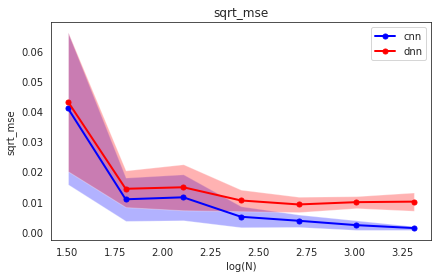

In [5]:
def plot_sqrt_mse():
    
    plt.figure(figsize=(15, 4))
    
    ax1 = plt.subplot(1, 2, 1)

    ax1.set(title='sqrt_mse', xlabel='log(N)', ylabel='sqrt_mse')

    x = np.log10(a_N)

    y = a_sqrt_mse_cnn
    std = a_std_abs_errors_cnn
    ax1.plot(x, y, '.b-', linewidth=2, markersize=10, label='cnn')
    ax1.fill_between(x, y - std, y + std, facecolor='blue', alpha=0.3)
    
    y = a_sqrt_mse_dnn
    std = a_std_abs_errors_dnn
    ax1.plot(x, y, '.r-', linewidth=2, markersize=10, label='dnn')
    ax1.fill_between(x, y - std, y + std, facecolor='red', alpha=0.3)
    
    plt.legend(loc='upper right')

plot_sqrt_mse()


# print statistics

In [6]:
df = pd.DataFrame({
    'N': a_N, 
    'sqrt_mse(DNN)': a_sqrt_mse_dnn, 
    'sqrt_mse(CNN)': a_sqrt_mse_cnn, 
    'std(DNN)': a_std_abs_errors_dnn, 
    'std(CNN)': a_std_abs_errors_cnn, 
    'avg_abs_error(DNN)': a_avg_abs_errors_dnn, 
    'avg_abs_error(CNN)': a_avg_abs_errors_cnn, 
})


df = df.set_index('N')

columns=[
    ('sqrt(MSE)','DNN'), ('sqrt(MSE)','CNN'), 
    ('STD', 'DNN'), ('STD', 'CNN'),
    ('avg(abs(err))','DNN'), ('avg(abs(err))','CNN'), 
]

df.columns=pd.MultiIndex.from_tuples(columns)

print('err = y_test - y_pred')
df

err = y_test - y_pred


sqrt(MSE)                 STD           avg(abs(err))          
             DNN       CNN       DNN       CNN           DNN       CNN
N                                                                     
32.0    0.043260  0.041040  0.023159  0.025286      0.034554  0.031745
64.0    0.014299  0.010801  0.006112  0.007213      0.011205  0.007880
128.0   0.014803  0.011461  0.007661  0.007652      0.011365  0.008075
256.0   0.010409  0.004984  0.003591  0.003501      0.008288  0.003397
512.0   0.009084  0.003653  0.002553  0.002071      0.007459  0.002613
1024.0  0.009846  0.002195  0.001992  0.001593      0.008150  0.001378
2048.0  0.010022  0.001215  0.003038  0.000609      0.008145  0.000886